In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import yfinance as yf
from networkx.algorithms import community
import igraph as ig
from igraph import*
import missingno as ms

In [2]:
df = pd.read_excel('/home/abe/Documents/Bilen1.xlsx', sheet_name='Sheet1')
df.head()

,SN,List of stakeholder by rank,Level of engagement/160,Level of importance/160,Level of influence/160,Level of involvement/160,Level of posses of resources/expertise/knowledge/160,Total score/800,Percent/100
0,1.0,World Health Organization (WHO),146.0,147.0,148.0,150.0,102.0,693,86.625
1,2.0,Ministry of Health (MoH),142.0,141.0,150.0,154.0,103.0,690,86.250
2,3.0,National Disaster Risk Management Commission (...,129.0,142.0,149.0,149.0,101.0,670,83.750
3,4.0,Regional Health Bureaus,135.0,144.0,147.0,145.0,99.0,670,83.750
4,5.0,US - CDC,138.0,145.0,137.0,143.0,103.0,666,83.250


In [3]:
us_graph=nx.from_pandas_edgelist(df,source='List of stakeholder by rank',target='Percent/100')

In [30]:
type(us_graph)

networkx.classes.graph.Graph

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the Excel file
#df = pd.read_excel('social_network_data.xlsx')

# Extract the source and target columns
source_data = df['List of stakeholder by rank']
target_data = df['Percent/100']

# Select the specific source node for comparison
specific_source = 'World Health Organization (WHO)',  # Replace with your desired specific source node

# Create an undirected graph
G = nx.Graph()

# Add edges to the graph
for i in range(len(source_data)):
    source = str(source_data[i])
    target = str(target_data[i])
    G.add_edge(source, target)

# Extract the nodes connected to the specific source node
connected_nodes = list(G.neighbors(specific_source))

# Create a subgraph with the specific source node and its connected nodes
subgraph_nodes = [specific_source] + connected_nodes
subgraph = G.subgraph(subgraph_nodes)

# Calculate centrality measures for the subgraph
degree_centrality = nx.degree_centrality(subgraph)
betweenness_centrality = nx.betweenness_centrality(subgraph)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=True, node_size=500)

# Add degree centrality as node labels
nx.draw_networkx_labels(subgraph, pos, labels=degree_centrality, font_size=8)

# Add edge labels manually
for edge in subgraph.edges():
    edge_label = betweenness_centrality.get(edge, "")
    plt.text(pos[edge[0]][0], pos[edge[0]][1], edge_label)

# Show the plot
plt.show()

NetworkXError: The node ('World Health Organization (WHO)',) is not in the graph.

In [ ]:
# check nodes
us_graph.nodes()

In [32]:
len(us_graph.nodes())

112

In [33]:
us_graph.edges()

EdgeView([('World Health Organization (WHO)', 86.625), ('Ministry of Health (MoH)', 86.25), ('National Disaster Risk Management Commission (NDRMC)', 83.75), (83.75, 'Regional Health Bureaus'), ('US - CDC', 83.25), ('Africa CDC', 80.875), ('USAID', 79.5), ('Ministry of Finance', 78.875), ('UNICEF', 78.5), ('World Bank', 76.375), ('Media and communication outlets', 75.125), ('Professionals', 74.875), (74.875, 'World Food Program'), ('Community', 74.375), (74.375, 'WFP'), ('Ethiopia Pharmaceutical Supply Agency (EPSA)', 73.875), (73.875, 'Public / community'), ('Global Fund', 73.75), ('Food and Drug Authority (FDA)', 73.125), ('Ministry of Agriculture', 72.125), ('UNCHR', 72.0), ('Prime Minister Office', 71.875), ('OCHA', 71.625), ('Parliament', 71.0), ('Bole International Airport', 70.625), ('Ethiopian Public Health Associations (EPHA)', 70.0), ('One health security council', 68.625), ('IOM', 67.875), (67.875, 'Ministry of defense'), ('African Development Bank', 67.125), ('ICAP', 66.75),

In [34]:
len(us_graph.edges())

61

In [35]:
nx.Info(us_graph)

AttributeError: module 'networkx' has no attribute 'Info'

# Visualization

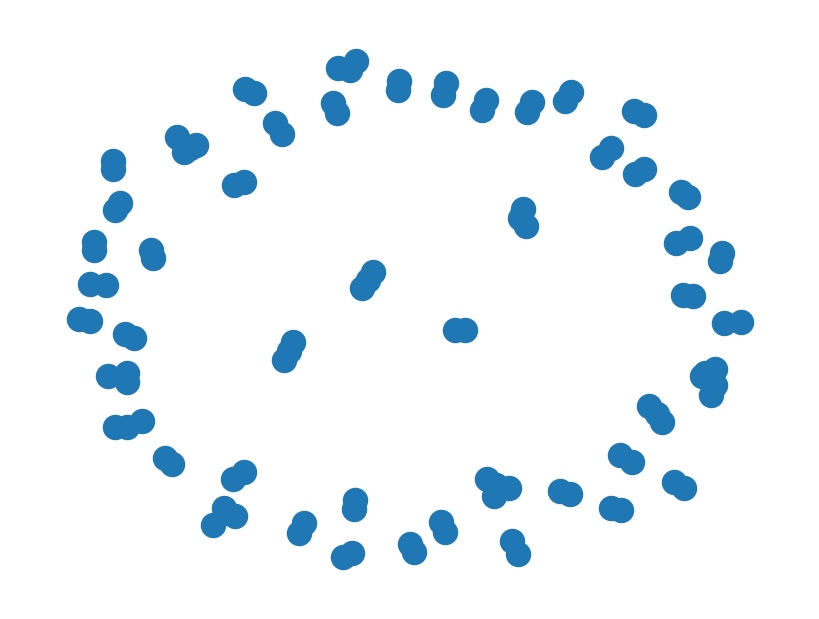

In [36]:
%matplotlib inline
fig=plt.figure(figsize=(8,6))
nx.draw(us_graph)
plt.show()

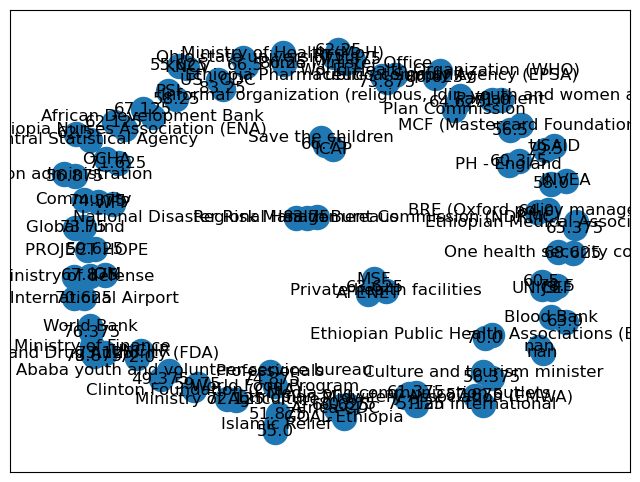

In [37]:
plt.figure(figsize=(8,6))
nx.draw_networkx(us_graph,with_labels=True)
plt.show()

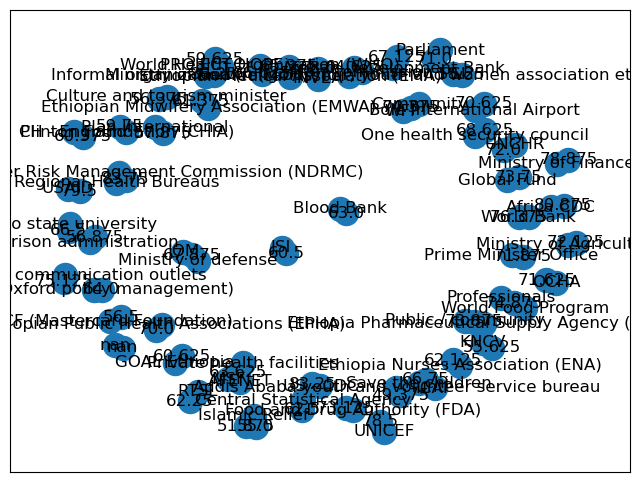

In [38]:
plt.figure(figsize=(8,6))
nx.draw_networkx(us_graph)
plt.show()

In [39]:
plt.savefig("WHO.png")

<Figure size 640x480 with 0 Axes>

# Analysis
* Degree of Centrality
* Most Infuential
* Most Important connection
* Best Betweener
* Shortest path

In [41]:
nx.degree(us_graph)

DegreeView({'World Health Organization (WHO)': 1, 86.625: 1, 'Ministry of Health (MoH)': 1, 86.25: 1, 'National Disaster Risk Management Commission (NDRMC)': 1, 83.75: 2, 'Regional Health Bureaus': 1, 'US - CDC': 1, 83.25: 1, 'Africa CDC': 1, 80.875: 1, 'USAID': 1, 79.5: 1, 'Ministry of Finance': 1, 78.875: 1, 'UNICEF': 1, 78.5: 1, 'World Bank': 1, 76.375: 1, 'Media and communication outlets': 1, 75.125: 1, 'Professionals': 1, 74.875: 2, 'World Food Program': 1, 'Community': 1, 74.375: 2, 'WFP': 1, 'Ethiopia Pharmaceutical Supply Agency (EPSA)': 1, 73.875: 2, 'Public / community': 1, 'Global Fund': 1, 73.75: 1, 'Food and Drug Authority (FDA)': 1, 73.125: 1, 'Ministry of Agriculture': 1, 72.125: 1, 'UNCHR': 1, 72.0: 1, 'Prime Minister Office': 1, 71.875: 1, 'OCHA': 1, 71.625: 1, 'Parliament': 1, 71.0: 1, 'Bole International Airport': 1, 70.625: 1, 'Ethiopian Public Health Associations (EPHA)': 1, 70.0: 1, 'One health security council': 1, 68.625: 1, 'IOM': 1, 67.875: 2, 'Ministry of def

In [42]:
nx.degree(us_graph, "Ministry of Health (MoH)")

1

In [43]:
nx.degree(us_graph,'Food and Drug Authority (FDA)')

1

In [46]:
nx.degree_centrality(us_graph)#"Ministry of Health (MoH)")

{'World Health Organization (WHO)': 0.009009009009009009,
 86.625: 0.009009009009009009,
 'Ministry of Health (MoH)': 0.009009009009009009,
 86.25: 0.009009009009009009,
 'National Disaster Risk Management Commission (NDRMC)': 0.009009009009009009,
 83.75: 0.018018018018018018,
 'Regional Health Bureaus': 0.009009009009009009,
 'US - CDC': 0.009009009009009009,
 83.25: 0.009009009009009009,
 'Africa CDC': 0.009009009009009009,
 80.875: 0.009009009009009009,
 'USAID': 0.009009009009009009,
 79.5: 0.009009009009009009,
 'Ministry of Finance': 0.009009009009009009,
 78.875: 0.009009009009009009,
 'UNICEF': 0.009009009009009009,
 78.5: 0.009009009009009009,
 'World Bank': 0.009009009009009009,
 76.375: 0.009009009009009009,
 'Media and communication outlets': 0.009009009009009009,
 75.125: 0.009009009009009009,
 'Professionals': 0.009009009009009009,
 74.875: 0.018018018018018018,
 'World Food Program': 0.009009009009009009,
 'Community': 0.009009009009009009,
 74.375: 0.018018018018018018

In [52]:
most_influential=sorted(nx.degree_centrality(us_graph).values())

In [56]:
nx.eigenvector_centrality

<function networkx.algorithms.centrality.eigenvector.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)>

In [3]:
df.iloc[3]

SN                                                                           4.0
List of stakeholder by rank                              Regional Health Bureaus
Level of engagement/160                                                    135.0
Level of importance/160                                                    144.0
Level of influence/160                                                     147.0
Level of involvement/160                                                   145.0
Level of posses of resources/expertise/knowledge/160                        99.0
Total score/800                                                              670
Percent/100                                                                83.75
Name: 3, dtype: object

<Axes: >

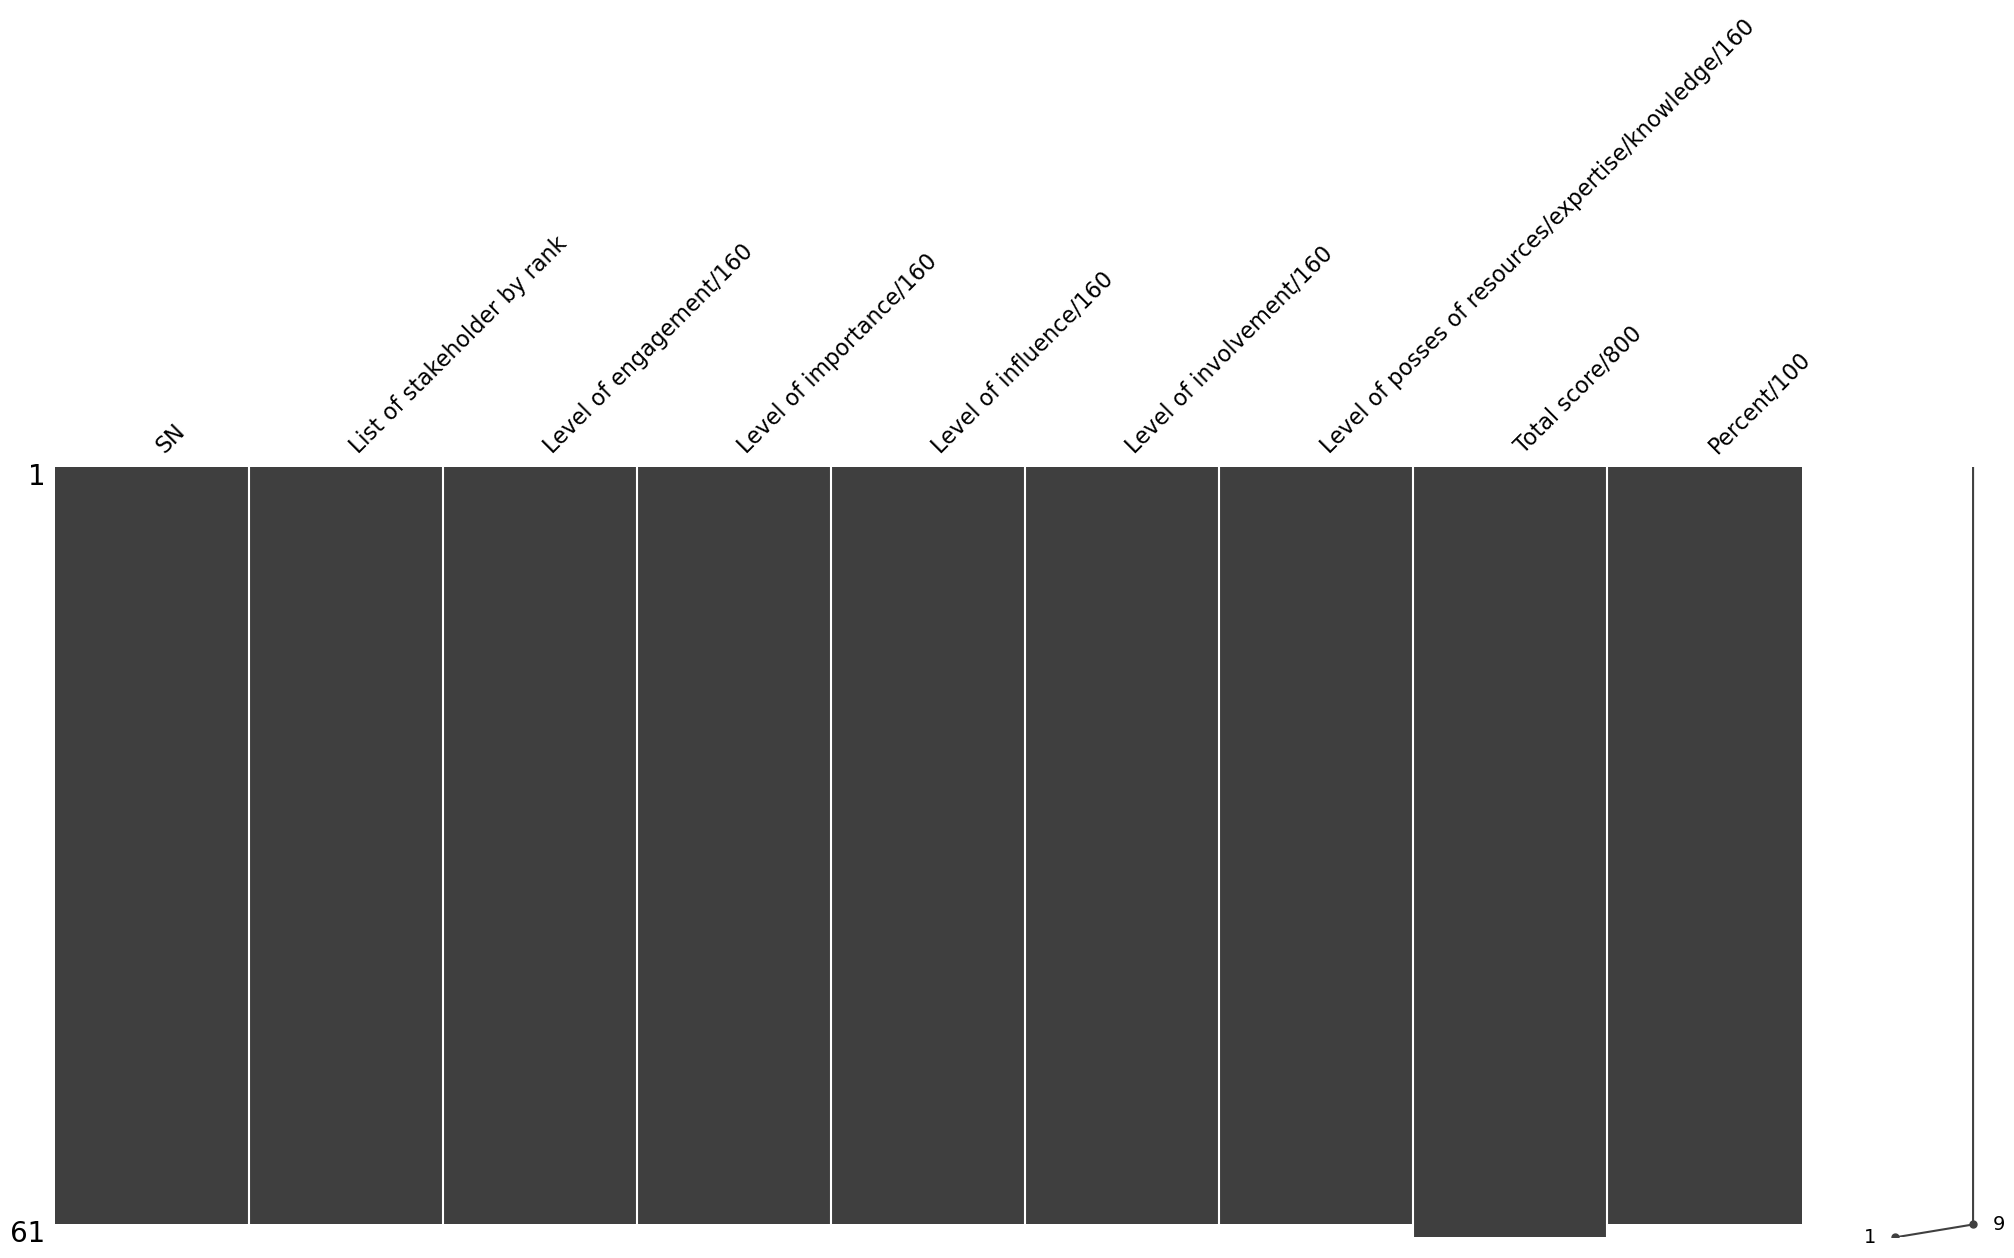

In [4]:
ms.matrix(df)

In [6]:
from networkx.drawing.nx_pydot import write_dot

In [9]:
#DG=make_graph(data,min_edges=10)
#write_dot(DG,"requirement_graph.dot")

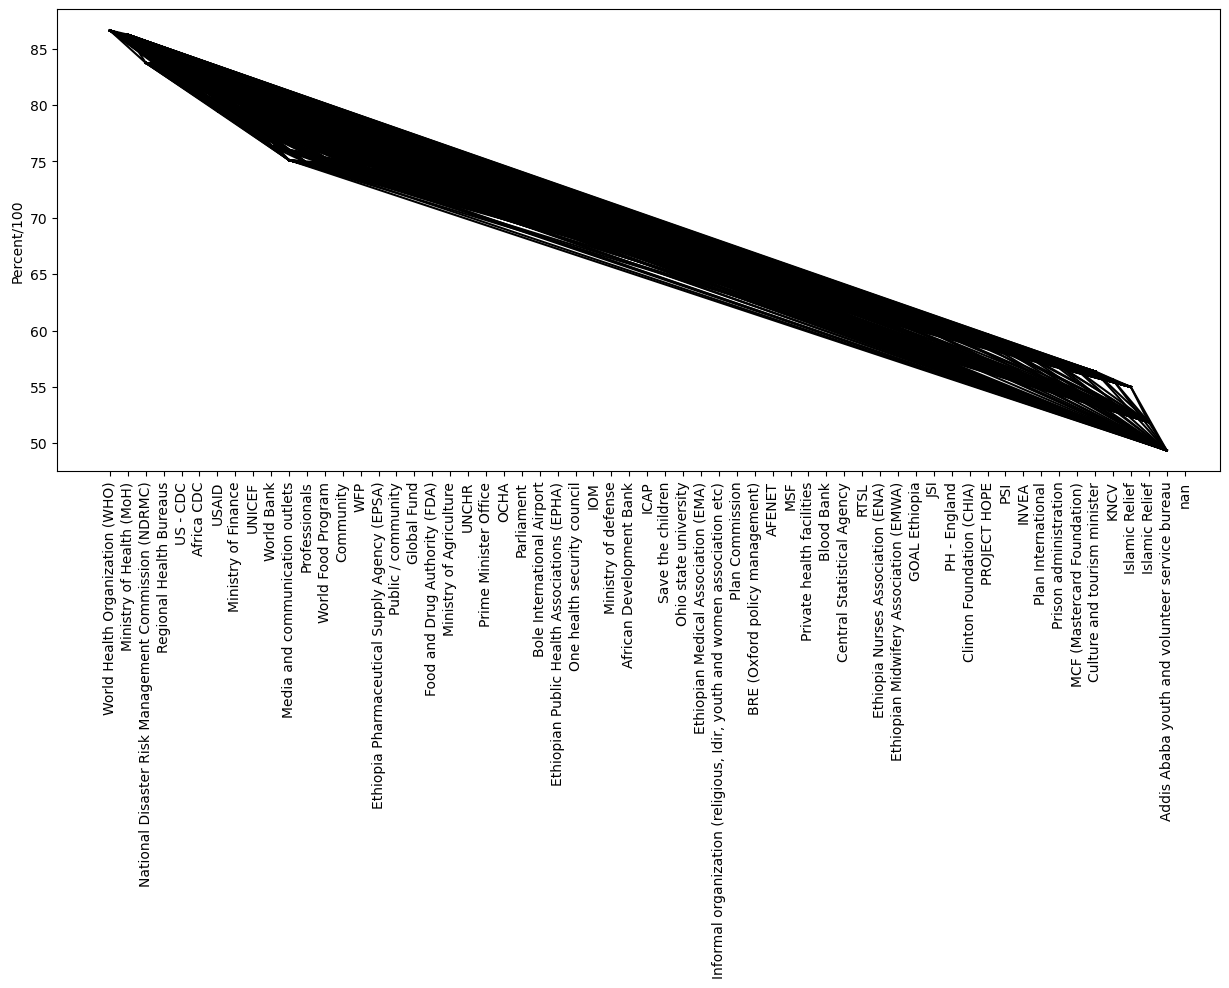

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel dataset
# df = pd.read_excel('grades.xlsx', sheet_name='Sheet1')

# Extract participant names and grades
participants = df['List of stakeholder by rank']
grades = df['Percent/100']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the lines between participants
for i in range(len(participants)):
    for j in range(i + 1, len(participants)):
        ax.plot([i, j], [grades[i], grades[j]], 'k-')

# Set the x-axis labels to participant names
ax.set_xticks(range(len(participants)))
ax.set_xticklabels(participants, rotation=90)

# Set the y-axis label to 'Grade'
ax.set_ylabel('Percent/100')

# Show the plot
plt.show()

In [13]:
nodes = []
edges = []

In [14]:
for index, row in df.iterrows():
    participant = row['List of stakeholder by rank']
    nodes.append(participant)

In [15]:
threshold = 75

for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if df.loc[i, 'Percent/100'] >= threshold and df.loc[j, 'Percent/100'] >= threshold:
            edges.append((nodes[i], nodes[j]))

In [16]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

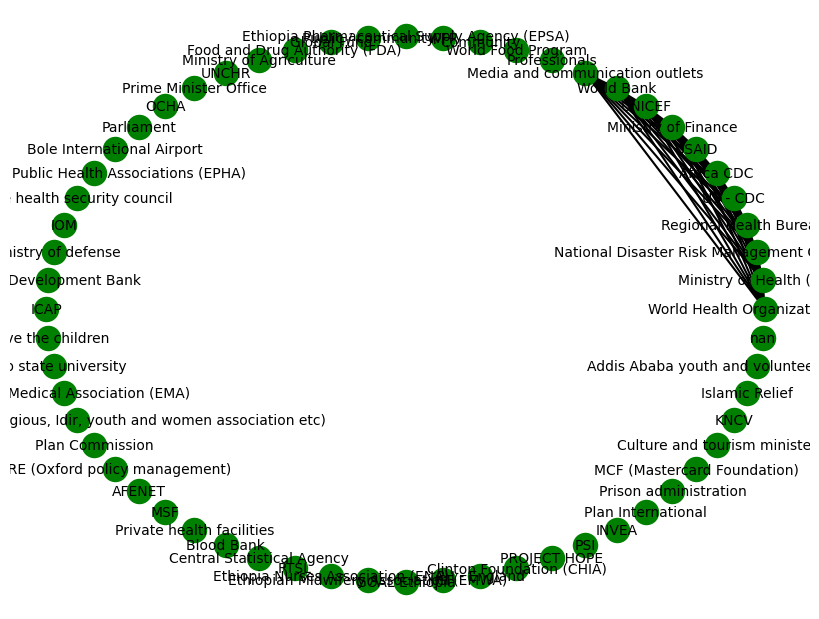

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
import seaborn as sns
pos = nx.circular_layout(G)  # Circular layout
#pos = nx.spring_layout(G)  # Layout for node positions
nx.draw(G, pos, with_labels=True, node_color='g',font_size=10, font_color='black', edge_color='k',font_family='sans-serif',width=1.5)
#nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.show()

In [18]:
import community

In [19]:
partition = community.best_partition(G)

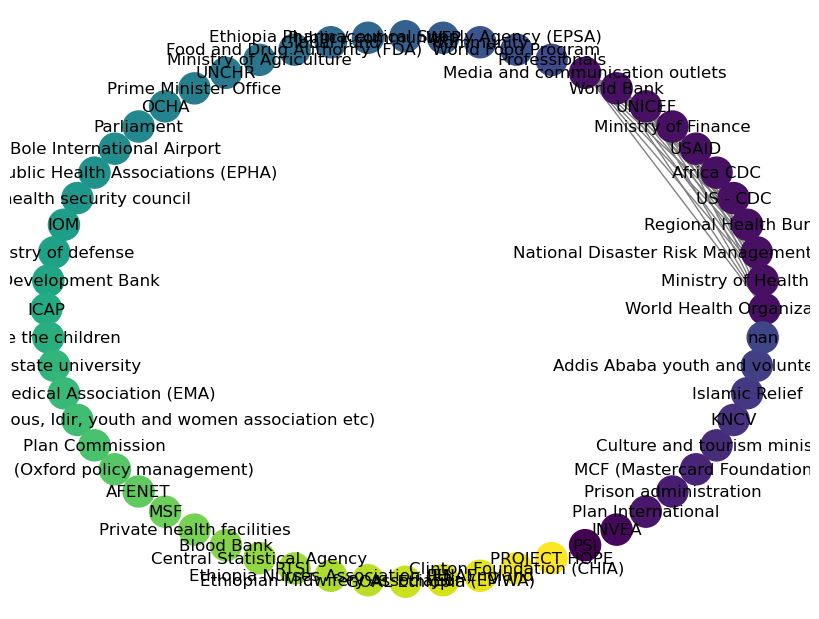

In [20]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
# Assuming you have already created the network grid 'G' and detected the communities

# Create a list of unique community labels
community_labels = set(partition.values())

# Generate a color map for communities
cmap = plt.get_cmap('viridis', len(community_labels))

# Assign node colors based on communities
node_colors = [cmap(partition[node]) for node in G.nodes()]

# Draw the network grid with community colors
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, edge_color='gray')
plt.show()


In [21]:
degree_centrality = nx.degree_centrality(G)
communities = nx.community.greedy_modularity_communities(G)

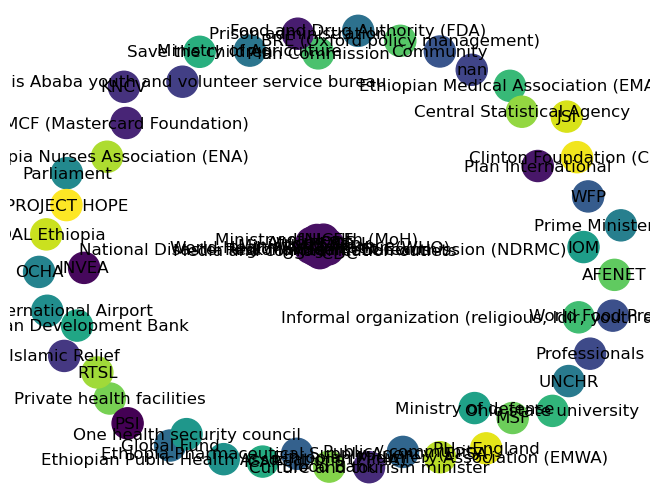

In [22]:
nx.draw(G,node_color=node_colors, node_size=500, with_labels=True)

In [25]:
G.nodes

NodeView(('World Health Organization (WHO)', 'Ministry of Health (MoH)', 'National Disaster Risk Management Commission (NDRMC)', 'Regional Health Bureaus', 'US - CDC', 'Africa CDC', 'USAID', 'Ministry of Finance', 'UNICEF', 'World Bank', 'Media and communication outlets', 'Professionals', 'World Food Program', 'Community', 'WFP', 'Ethiopia Pharmaceutical Supply Agency (EPSA)', 'Public / community', 'Global Fund', 'Food and Drug Authority (FDA)', 'Ministry of Agriculture', 'UNCHR', 'Prime Minister Office', 'OCHA', 'Parliament', 'Bole International Airport', 'Ethiopian Public Health Associations (EPHA)', 'One health security council', 'IOM', 'Ministry of defense', 'African Development Bank', 'ICAP', 'Save the children', 'Ohio state university', 'Ethiopian Medical Association (EMA)', 'Informal organization (religious, Idir, youth and women association etc)', 'Plan Commission', 'BRE (Oxford policy management)', 'AFENET', 'MSF', 'Private health facilities', 'Blood Bank', 'Central Statistica

In [ ]:
sns.corr(data)